# Example for Chart Challenge
Discharge above and below Magic Reservoir in Idaho<br>Hayley Corson-Dosch<br>2023-03-13

## Instructions for using this template

> Make sure you have copied the template subdirectory and named it with your prompt's date, prompt's name and your name (e.g., `/01_part-to-whole_cnell`) before editing this document!

1. Put all comments either in markdown text (like this) or in the `Python` cells to explain your process to Vizlab reviewers
2. Put all Python code in the Python cells within each section. The sections are organized for you to (in order): do some set-up steps (import packages), load in any data (manually or with built in packages), process your data for plotting, create a plot using matplotlib, and finally compose the final twitter image.
3. You can run individual code chunks while developing code and plots.
4. Make sure to save your output `png` in the `out/` folder, named with the date of the prompt that you've been assigned to, the prompt, and your name (e.g., `20230101_part-to-whole_cnell.png`). 
5. When you're happy with the final plot, fill out the supporting information at the bottom and push to gitlab for review. Note: only commit input data if it can't be downloaded directly with code.

## Set up
Import packages here

In [9]:
! conda list

# packages in environment at /Users/msleckman/USGS/Vizlab/chart-challenge-23/env:
#
# Name                    Version                   Build  Channel
affine                    2.4.0              pyhd8ed1ab_0    conda-forge
anyio                     3.6.2              pyhd8ed1ab_0    conda-forge
appnope                   0.1.3              pyhd8ed1ab_0    conda-forge
argon2-cffi               21.3.0             pyhd8ed1ab_0    conda-forge
argon2-cffi-bindings      21.2.0           py39ha30fb19_3    conda-forge
asttokens                 2.2.1              pyhd8ed1ab_0    conda-forge
attrs                     22.2.0             pyh71513ae_0    conda-forge
backcall                  0.2.0              pyh9f0ad1d_0    conda-forge
backports                 1.0                pyhd8ed1ab_3    conda-forge
backports.functools_lru_cache 1.6.4              pyhd8ed1ab_0    conda-forge
beautifulsoup4            4.12.2             pyha770c72_0    conda-forge
bleach                    6.0.0           

In [1]:
# Import required packages for data loading/analysis
import pandas as pd
import numpy as np
import geopandas as gpd

# Import required packages for plotting and plot composition
import matplotlib.pyplot as plt
import matplotlib.image as image
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)

In [2]:
import gisutils


In [3]:
# Import pydrograph 
# Must clone pydrograph to local machine, and place pydrograph subfolder in project directory
# pydrograph code: https://github.com/aleaf/pydrograph
import pydrograph
from pydrograph import Nwis
from pydrograph.attributes import streamflow_attributes

## Load files

Save any files that you are using directly in the `in` folder. Then read them in to the environment with this chunk of code. Remember, use relative file pathways, and never include any personal computer file pathways.

This is also a good place to load any data from other built-in packages or pulled with an API.

#### Download NWIS data with `pydrograph`
##### NWIS sites
* USGS 13140800 BIG WOOD RIVER AT STANTON CROSSING NR BELLEVUE ID - above dam (upstream)
  * https://waterdata.usgs.gov/usa/nwis/uv?13140800
* USGS 13142500 BIG WOOD RIVER BL MAGIC DAM NR RICHFIELD ID - below dam (downstream)
  * https://waterdata.usgs.gov/usa/nwis/uv?13142500
* Import data following instructions in pydrograph README.md
  * https://github.com/aleaf/pydrograph

In [5]:
# define sites
magic_sites = {'above': 13140800, 'below': 13142500}

In [6]:
# set start and end dates
start_date = '1996-01-01'
end_date = '2021-12-31'

In [10]:
# set bounding box
magic_bbox = [-114.5, 43.5, -114.1, 43.1] # nw lon, nw lat, se lon, se lat
nwis = pydrograph.Nwis(magic_bbox)

In [11]:
# Generate a url to get field measurements for the bounding box
url = nwis.make_site_url('field_measurements', streamflow_attributes)

In [12]:
# Get a dataframe of site information for the bounding box (url is generated internally)
field_sites = nwis.get_siteinfo('field_measurements')

getting site inventory for field_measurements...
url: http://nwis.waterdata.usgs.gov/usa/nwis/measurements?nw_longitude_va=-114.500&nw_latitude_va=43.100&se_longitude_va=-114.100&se_latitude_va=43.500&coordinate_format=decimal_degrees&group_key=NONE&format=sitefile_output&sitefile_output_format=rdb&column_name=site_no&column_name=station_nm&column_name=site_tp_cd&column_name=dec_lat_va&column_name=dec_long_va&column_name=coord_meth_cd&column_name=coord_acy_cd&column_name=coord_datum_cd&column_name=dec_coord_datum_cd&column_name=district_cd&column_name=state_cd&column_name=county_cd&column_name=country_cd&column_name=land_net_ds&column_name=map_nm&column_name=map_scale_fc&column_name=alt_va&column_name=alt_meth_cd&column_name=alt_acy_va&column_name=alt_datum_cd&column_name=huc_cd&column_name=basin_cd&column_name=topo_cd&column_name=inventory_dt&column_name=drain_area_va&column_name=contrib_drain_area_va&column_name=tz_cd&column_name=local_time_fg&column_name=reliability_cd&column_name=p

In [13]:
# Write the site information out to a shapefile
gisutils.df2shp(field_sites, 'out/NWIS_field_measurements.shp')

writing out/NWIS_field_measurements.shp... Done


/Users/msleckman/USGS/Vizlab/chart-challenge-23/env/lib/python3.9/site-packages/gisutils/shapefile.py:129: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  Type = g.type


In [14]:
# Get inventory of daily values sites
dv_sites = nwis.get_siteinfo('daily_values')

getting site inventory for daily_values...
url: http://nwis.waterdata.usgs.gov/usa/nwis/dv?referred_module=sw&site_tp_cd=ST&nw_longitude_va=-114.500&nw_latitude_va=43.100&se_longitude_va=-114.100&se_latitude_va=43.500&coordinate_format=decimal_degrees&group_key=NONE&format=sitefile_output&sitefile_output_format=rdb&column_name=site_no&column_name=station_nm&column_name=site_tp_cd&column_name=dec_lat_va&column_name=dec_long_va&column_name=coord_meth_cd&column_name=coord_acy_cd&column_name=coord_datum_cd&column_name=dec_coord_datum_cd&column_name=district_cd&column_name=state_cd&column_name=county_cd&column_name=country_cd&column_name=land_net_ds&column_name=map_nm&column_name=map_scale_fc&column_name=alt_va&column_name=alt_meth_cd&column_name=alt_acy_va&column_name=alt_datum_cd&column_name=huc_cd&column_name=basin_cd&column_name=topo_cd&column_name=inventory_dt&column_name=drain_area_va&column_name=contrib_drain_area_va&column_name=tz_cd&column_name=local_time_fg&column_name=reliability

In [15]:
# confirm that we have data for our sites
dv_sites['site_no'].unique

<bound method Series.unique of site_no
13140335    13140335
13140500    13140500
13140800    13140800
13140900    13140900
13141000    13141000
13141070    13141070
13142000    13142000
13142500    13142500
13143000    13143000
13150200    13150200
13150430    13150430
Name: site_no, dtype: object>

In [16]:
# pull data for upstream site
above_raw = nwis.get_dvs(magic_sites['above'], start_date = start_date, end_date = end_date)

http://waterservices.usgs.gov/nwis/dv/?format=rdb&sites=13140800&startDT=1996-01-01&endDT=2021-12-31&parameterCd=00060


In [17]:
# pull data for downstream site
below_raw = nwis.get_dvs(magic_sites['below'], start_date = start_date, end_date = end_date)

http://waterservices.usgs.gov/nwis/dv/?format=rdb&sites=13142500&startDT=1996-01-01&endDT=2021-12-31&parameterCd=00060


#### Load spatial data
* Download data by drawn extent (box surrounding Magic Reservoir in Idaho) from https://apps.nationalmap.gov/downloader/#/
* Unzip downloaded data to geodatabase located within the `in` folder in the project directory

##### Magic reservoir polygon

In [19]:
# Load shapefile of all reservoirs in project extent
reservoirs = gpd.read_file("in/Python/WBD_17_HU2_GDB/WBD_17_HU2_GDB.gdb", driver='FileGDB', layer='NHDWaterbody')

ValueError: Null layer: 'NHDWaterbody'

In [13]:
# Load shapefile of all rivers in extent
rivers = gpd.read_file("in/NHDPLUS_H_1704_HU4_GDB/NHDPLUS_H_1704_HU4_GDB.gdb", driver='FileGDB', layer='NHDFlowline')

In [14]:
# Load shapefile of all sites in extent
sites = gpd.read_file('out/NWIS_field_measurements.shp')

In [15]:
# Need to define projection, since undefined
sites.crs = 'EPSG:4269'

## Get data ready for plotting
  
This next section is for doing any pre-processing steps, data joins, etc, to get your data ready for plotting.

#### Process NWIS data

In [16]:
# make copies of raw data
# in case we mess it up later -- we can get the original data without re-pulling it
above_df = above_raw.copy()
below_df = below_raw.copy()

In [17]:
# check name of NWIS returned flow parameter and rename for use in plotting later - here '296355_00060_00003'
below_df.head(1)

,agency_cd,site_no,datetime,296355_00060_00003,296355_00060_00003_cd
datetime,,,,,
1996-01-01,USGS,13142500,1996-01-01,7.7,A


In [18]:
below_df = below_df.rename(columns = {'296355_00060_00003': 'flow_cfs'})

In [19]:
# check name of NWIS returned flow parameter and rename for use in plotting later - here '296355_00060_00003'
above_df.head(1)

,agency_cd,site_no,datetime,45750_00060_00003,45750_00060_00003_cd
datetime,,,,,
1996-09-18,USGS,13140800,1996-09-18,44.0,A


In [20]:
above_df = above_df.rename(columns = {'45750_00060_00003': 'flow_cfs'})

In [21]:
# convert the datetime columns to pandas datetime
above_df['datetime'] = pd.to_datetime(above_df['datetime'])
below_df['datetime'] = pd.to_datetime(below_df['datetime'])

In [22]:
# filter the data to the desired timeframe
# in this case restricted by the period of record for the upstream site
above_df = above_df.loc[(above_df['datetime'] > '1996-09-30') & (above_df['datetime'] < '2020-10-01')]
below_df = below_df.loc[(below_df['datetime'] > '1996-09-30') & (below_df['datetime'] < '2020-10-01')]

In [23]:
# add a column for calendar year and one for month
above_df['year'] = [i.year for i in above_df['datetime']]
below_df['year'] = [i.year for i in below_df['datetime']]
above_df['month'] = [i.month for i in above_df['datetime']]
below_df['month'] = [i.month for i in below_df['datetime']]

In [24]:
# add an empty column for water year and then populate it
### (defined as October 1 - September 30 -- https://water.usgs.gov/nwc/explain_data.html)
above_df['wateryear'] = np.nan
below_df['wateryear'] = np.nan
above_df.loc[above_df['month'] < 10, 'wateryear'] = above_df['year']
above_df.loc[above_df['month'] > 9, 'wateryear'] = above_df['year'] + 1
below_df.loc[below_df['month'] < 10, 'wateryear'] = below_df['year']
below_df.loc[below_df['month'] > 9, 'wateryear'] = below_df['year'] + 1

In [25]:
# make a new dataframe with a day-of-water-year (DOWY) column
# here we subset the data to one water year, then use the dataframe index
# (running from 0 - 364) to define the day of the water year
above_wy_df = []
for year in range(1997, 2021):
    above_subset = above_df.loc[above_df['wateryear'] == year]
    above_subset = above_subset.reset_index(drop=True)
    above_subset['DOWY'] = above_subset.index + 1
    above_wy_df.append(above_subset)
above_wy_df = pd.concat(above_wy_df)

In [26]:
# do the same for the downstream site
below_wy_df = []
for year in range(1997, 2021):
    below_subset = below_df.loc[below_df['wateryear'] == year]
    below_subset = below_subset.reset_index(drop=True)
    below_subset['DOWY'] = below_subset.index + 1
    below_wy_df.append(below_subset)
below_wy_df = pd.concat(below_wy_df)

In [27]:
# compute the median for each day of the water year
above_wy_median = above_wy_df.groupby('DOWY').median()
below_wy_median = below_wy_df.groupby('DOWY').median()

#### Process spatial data

##### Reservoir

In [28]:
# Pull out magic reservoir
magic_reservoir = reservoirs.loc[reservoirs['GNIS_Name'] == 'Magic Reservoir']

In [29]:
# check projection?
magic_reservoir.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [30]:
# reproject magic reservoir polygon to UTM zone 11N
magic_reservoir_proj = magic_reservoir.to_crs(epsg = '32611')

##### Bigwood River polyline and Camas Creek polyline

In [31]:
# Pull out polyline for Bigwood River and Camas Creek
magic_rivers = rivers.loc[(rivers['GNIS_Name'] == 'Big Wood River') | (rivers['GNIS_Name'] == 'Camas Creek')]

In [32]:
# project polylines to UTM zone 11N
magic_rivers_proj = magic_rivers.to_crs(epsg = '32611')

##### Upstream and downstream points

In [33]:
# Pull out above and below sites (site_no must be string)
bigwood_sites = sites.loc[(sites['site_no'] == str(magic_sites['above'])) | (sites['site_no'] == str(magic_sites['below']))]

In [34]:
# project points to UTM zone 11N
bigwood_sites_proj = bigwood_sites.to_crs(epsg = '32611')

In [35]:
# Make separate shapefiles for each site (for ease of plotting)
above_site = bigwood_sites_proj.loc[bigwood_sites_proj['site_no'] == str(magic_sites['above'])]
below_site = bigwood_sites_proj.loc[bigwood_sites_proj['site_no'] == str(magic_sites['below'])]

## Set up main plot

This chunk is where the main `matplotlib` set-up occurs.

#### Figure set-up

In [36]:
# set up figure parameters
plot_width = 16
plot_height = 9
plot_background_color = 'white'

In [37]:
# set up figure
fig = plt.figure(figsize=(plot_width, plot_height), constrained_layout=False) # constrained layout must be False to adjust subplot sizes within grid

<Figure size 1152x648 with 0 Axes>

In [38]:
# set up a grid for the subplots within the figure
# Add a gridspec with 3 rows (title, figure, citation) and set the ratio between the rows
# Here we're also adding 3 columns, since our main plot contains 3 subplots
# but if you had one subplot you could add a single column
# arguments 'left','right','top', and 'bottom' set the extent of the subplots as a fraction 
# of figure width or height. Left cannot be larger than right, and bottom cannot be larger than top.
# wspace and hspace set width and height reserved as spacing between plots, respectively 
# See docs here: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.gridspec.GridSpec.html#matplotlib.gridspec.GridSpec
# See tutorial here: https://matplotlib.org/3.1.1/tutorials/intermediate/gridspec.html
# You likely will need to tweak 'left' and 'right' to correctly center your plot(s)
# And wspace and hspace to allow room for your axes
# here I want my main plot to be 5.5 tall
main_plot_height = 5.5
gs = fig.add_gridspec(3, 3, width_ratios = (1,1,1), height_ratios=((plot_height-main_plot_height)/2, main_plot_height, (plot_height-main_plot_height)/2),
                      left=0, right=0.96, bottom=0, top=1,
                      wspace=0.18, hspace=0)

In [39]:
# add placeholders for a figure title (row 0, cols 1:3) and a data source citation (row 2, cols 1:3)
ax_title = fig.add_subplot(gs[0,0:3])
ax_title.axis('off')
ax_citation = fig.add_subplot(gs[2,0:3])
ax_citation.axis('off')

(0.0, 1.0, 0.0, 1.0)

#### Figure generation

In [40]:
# Build the main plots (in row 1)
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])
ax3 = fig.add_subplot(gs[1, 2], sharey=ax2)
fontsize = 20

#######################################################################
### Make map of sites, Bigwood reservoir, Bigwood River and Camas Creek
#######################################################################
magic_rivers_proj.plot(ax = ax1, zorder=1, color = 'lightgrey')
magic_reservoir_proj.plot(ax = ax1, zorder=1, color = 'lightgrey')
above_site.plot(ax = ax1, color = 'tab:cyan', zorder=2)
below_site.plot(ax = ax1, color = 'tab:purple', zorder=2)
# Set x and y axis limits
ax1.set_xlim(709000,720000)
ax1.set_ylim(4.7875e6,4.804e6)
# turn of axes
ax1.set_axis_off()
# Add annotations
ax1.annotate('downstream', xy=(715000,4.792e6), color = 'tab:purple', fontsize=fontsize)
ax1.annotate('upstream', xy=(713000,4.8012e6), color = 'tab:cyan', fontsize=fontsize)
ax1.annotate('Magic', xy=(713700,4.7971e6), color = 'dimgrey', fontsize=fontsize)
ax1.annotate('Reservoir', xy=(714300,4.7959e6), color = 'dimgrey', fontsize=fontsize)
# tweak the position of ax1 slightly
box = ax1.get_position()
box.x0 = box.x0 + 0.002
box.x1 = box.x1 + 0.002
ax1.set_position(box)


#######################################################################
### Make streamflow plots (streamflow, median streamflow, difference)
#######################################################################
# Plot streamflow for each water year on ax2 and ax3
for year in range(1997, 2021):
    above_subset = above_df.loc[above_df['wateryear'] == year]
    below_subset = below_df.loc[below_df['wateryear'] == year]
    above_subset = above_subset.reset_index(drop=True)
    below_subset = below_subset.reset_index(drop=True)
    # plot streamflow for each water year on ax2
    # add one to index to match DOWY index of above_wy_median dataframe
    ax2.plot(above_subset.index + 1, above_subset.flow_cfs, color='tab:cyan', alpha=0.08)
    ax2.plot(below_subset.index + 1, below_subset.flow_cfs, color='tab:purple', alpha=0.08)
    # plot difference between streamflow at two sites for each water year as area on ax3
    ax3.fill_between(above_subset.index + 1, above_subset.flow_cfs, below_subset.flow_cfs, where=(above_subset.flow_cfs > below_subset.flow_cfs), color='tab:cyan', alpha=0.04)
    ax3.fill_between(above_subset.index + 1, above_subset.flow_cfs, below_subset.flow_cfs, where=(above_subset.flow_cfs <= below_subset.flow_cfs), color='tab:purple', alpha=0.04)   

# Plot median streamflow for each day of water year on ax2
ax2.plot(above_wy_median.index, above_wy_median.flow_cfs, color='tab:cyan', alpha=1)
ax2.plot(below_wy_median.index, below_wy_median.flow_cfs, color='tab:purple', alpha=1)
# Use log scale
ax2.set_yscale('log')

# Style ax2 axis label
ax2.set_ylabel('Streamflow ($ft^3/s$)', color='dimgrey', fontsize=fontsize)
# Add annotations
ax2.annotate('upstream', xy=(60,150), color = 'tab:cyan', fontsize=fontsize)
ax2.annotate('median', xy=(60,75), color = 'tab:cyan', fontsize=fontsize)
ax2.annotate('downstream', xy=(200,6), color = 'tab:purple', fontsize=fontsize)
ax2.annotate('median', xy=(200,3.1), color = 'tab:purple', fontsize=fontsize)

# Plot difference between median streamflow for each day of water year on ax3
# Plot in two chunks, so can color differently
# above > below
ax3.fill_between(above_wy_median.index, above_wy_median.flow_cfs, below_wy_median.flow_cfs, where=(above_wy_median.flow_cfs > below_wy_median.flow_cfs), color='tab:cyan')
# above <= below
ax3.fill_between(above_wy_median.index, above_wy_median.flow_cfs, below_wy_median.flow_cfs, where=(above_wy_median.flow_cfs <= below_wy_median.flow_cfs), color='tab:purple')
# Use log scale
ax3.set_yscale('log')

# Add annotations
ax3.annotate('storing', xy=(52,80), color = 'tab:cyan', fontsize=fontsize)
ax3.annotate('water', xy=(72,40), color = 'tab:cyan', fontsize=fontsize)
ax3.annotate('releasing', xy=(237,15), color = 'tab:purple', fontsize=fontsize)
ax3.annotate('water', xy=(272,7.7), color = 'tab:purple', fontsize=fontsize)

# Style ax2 and ax3 together
for i, a in enumerate([ax2, ax3]):
    a.spines["top"].set_visible(False)
    a.spines["right"].set_visible(False)
    a.spines["bottom"].set_edgecolor('grey')
    a.spines["left"].set_edgecolor('grey')
    a.spines["left"].set_color('grey')
    a.tick_params(axis = 'y', colors = 'grey', labelsize=fontsize)
    for line in a.get_yticklines():
        line.set_color('grey')
    a.set_xticks([31, 92, 151, 212, 273, 335])
    a.set_xticklabels(['Nov', 'Jan', 'Mar', 'May', 'Jul', 'Sept'], fontsize=fontsize)
    a.set_xlim(0,366)
    for line in a.get_xticklines():
        line.set_color('grey')
    for label in a.get_xticklabels():
        label.set_color('grey')

<Figure size 432x288 with 0 Axes>

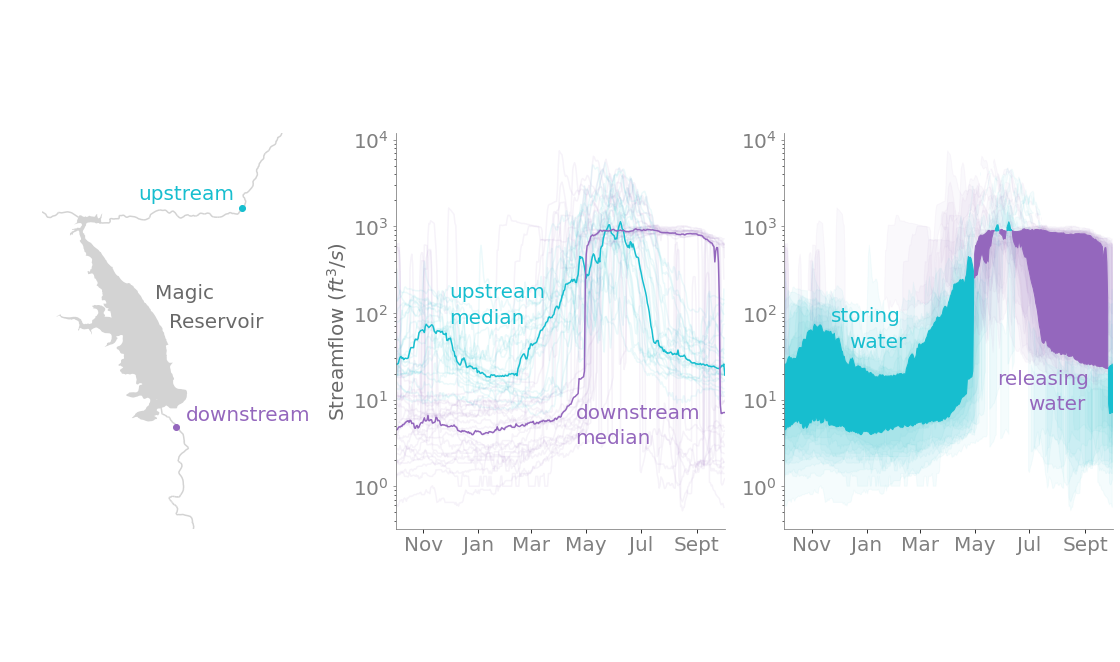

In [41]:
# Check fig - REMBEMBER: only row 1 will have plots, since we've put in blank placeholders for the title and citation
fig

## Produce final plot
Here, add the data source and USGS logo to create the final viz for sharing out on Twitter.

**Make sure to use the format for saving your png with the date of the prompt that you've been assigned to!** (e.g., `20230101_part-to-whole_cnell.png`)

#### Load USGS logo

In [42]:
logo_color = 'black' # 'black' or 'white'
logo = image.imread(f'../usgs_logo_{logo_color}.png')

#### Compose final plot

In [43]:
horizontal_margin = 0.02
vertical_margin = 0.03

##### Add plot title

In [44]:
# add additional axis to hold title
# position = (0,0), width = 100% of figure width (1), height = 100% of figure height (1)
title_ax = fig.add_axes([0, 0, 1, 1], anchor = 'SW', facecolor='none')

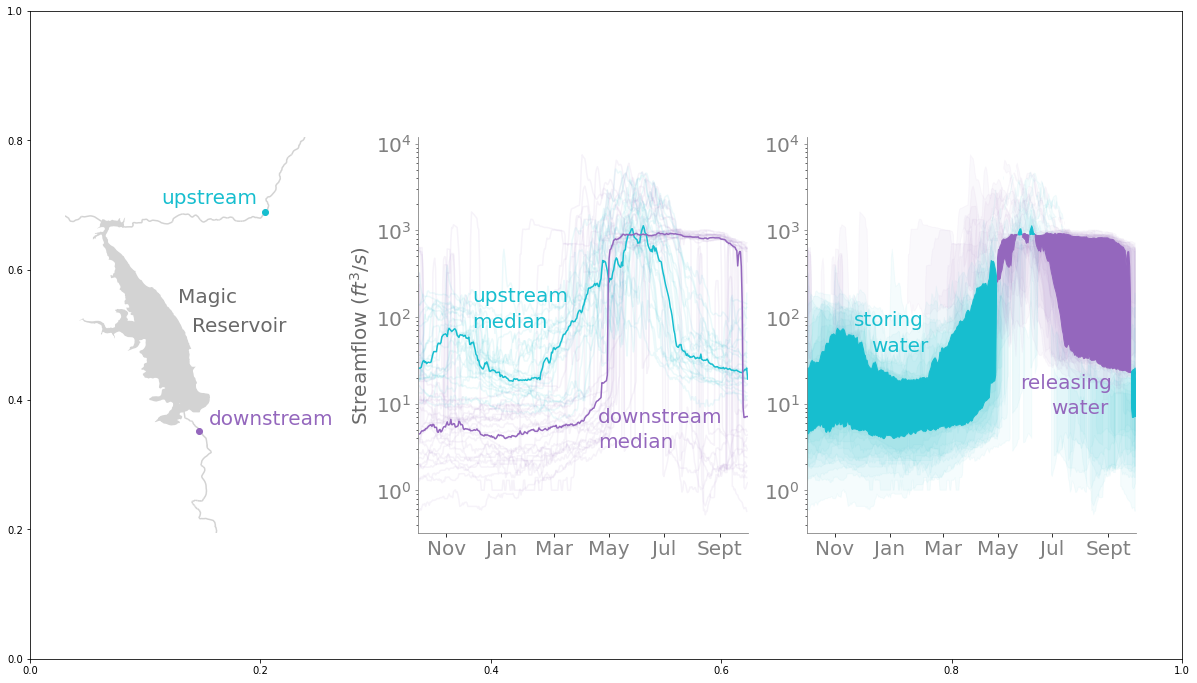

In [45]:
# check axis params
# adjust width and height params for text axis until axis fully covers plot w/o extending further
fig

In [46]:
# Add title, specifying color, style, and alignment
# see https://matplotlib.org/stable/gallery/text_labels_and_annotations/text_alignment.html
# for alignment tips
title_ax.text(x = horizontal_margin, y = 0.95, s = 'Streamflow above and below Magic Reservoir, 1997-2020', horizontalalignment='left', verticalalignment='top', color = 'black', fontsize=32, fontstyle='normal')
# remove axis lines
title_ax.axis('off')

(0.0, 1.0, 0.0, 1.0)

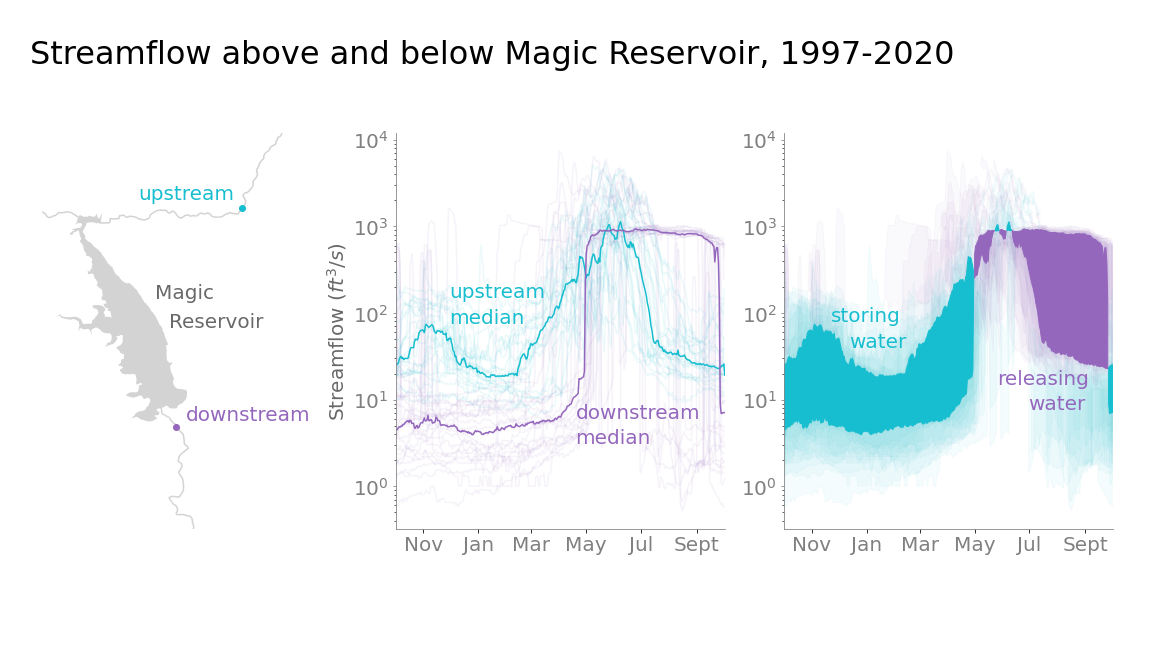

In [47]:
# check placement
fig

##### Add data source

In [48]:
# add additional axis to hold text 
# position = (0,0), width = 100% of figure width (1), height = 100% of figure height (1)
text_ax = fig.add_axes([0, 0, 1, 1], anchor = 'SW', facecolor='none')

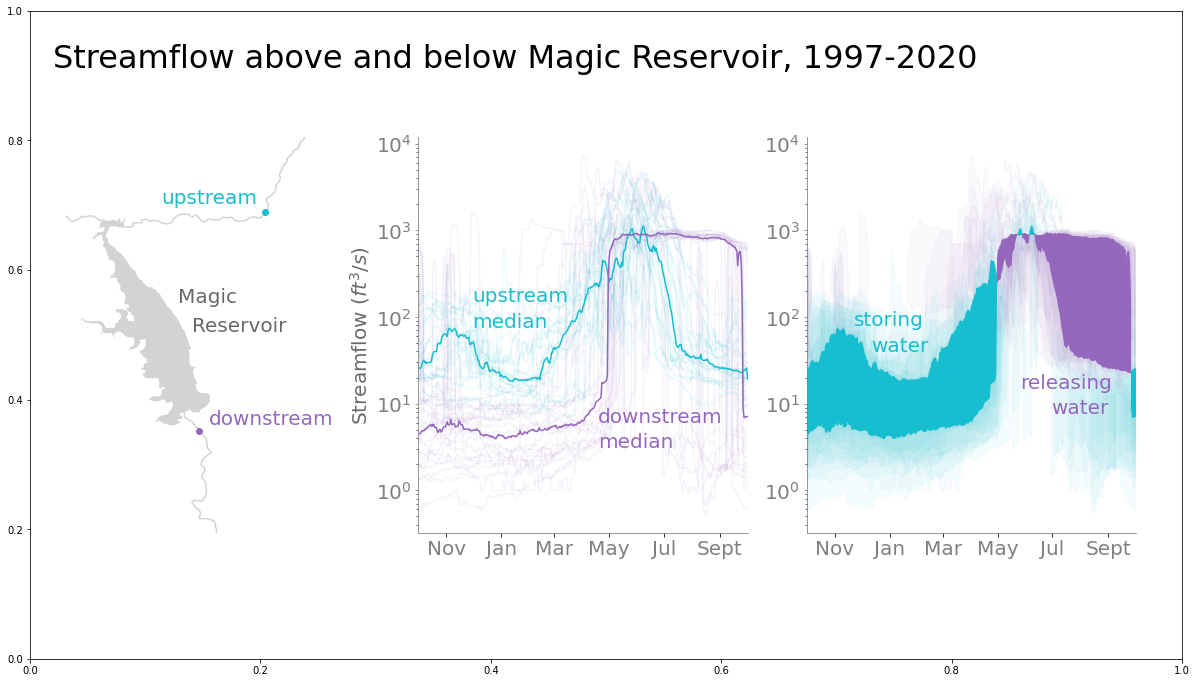

In [49]:
# check axis params
# adjust width and height params for text axis until axis fully covers plot w/o extending further
fig

In [50]:
# Add text, specifying color, style, and alignment
# see https://matplotlib.org/stable/gallery/text_labels_and_annotations/text_alignment.html
# for alignment tips
text_ax.text(x = 1-horizontal_margin, y = vertical_margin, s = 'Data from USGS National Hydrography Dataset & National Water Information System', horizontalalignment='right', verticalalignment='bottom', color = 'silver', fontsize=12, fontstyle='italic')
# remove axis lines
text_ax.axis('off')

(0.0, 1.0, 0.0, 1.0)

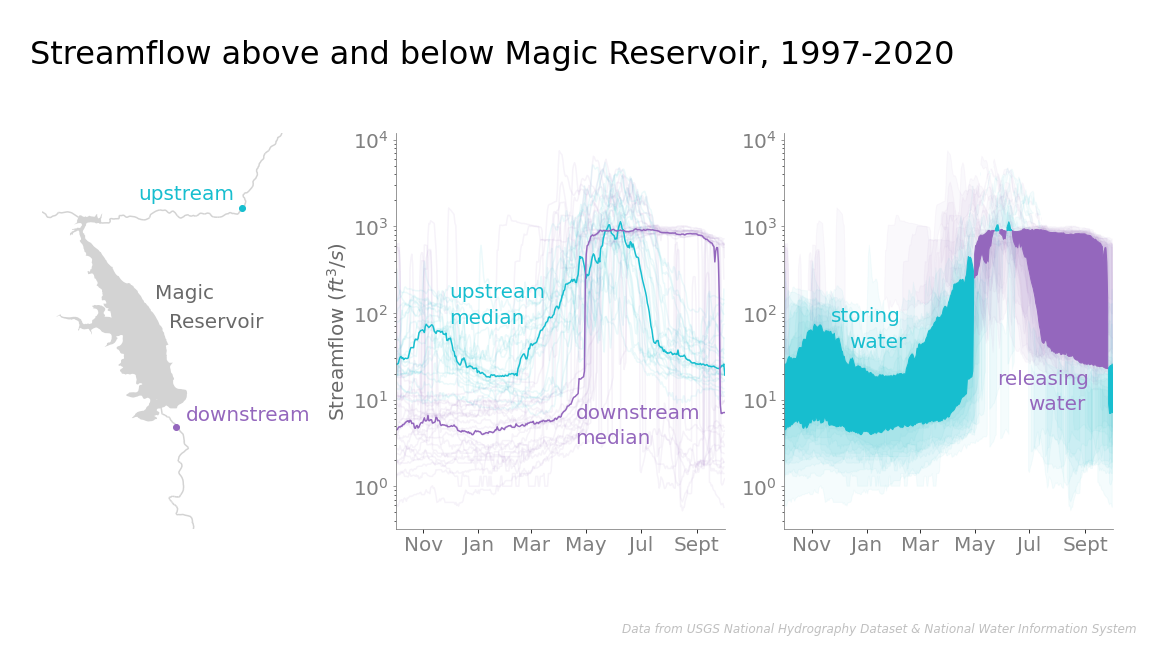

In [51]:
# check placement
fig

##### Add USGS logo

In [52]:
# set width and height fractions for logo
logo_width_fraction = 0.1
logo_height_fraction = 0.1

In [53]:
# add additional axis to hold logo
logo_ax = fig.add_axes([horizontal_margin,vertical_margin,0.1,0.1], anchor = 'SW', facecolor='none')

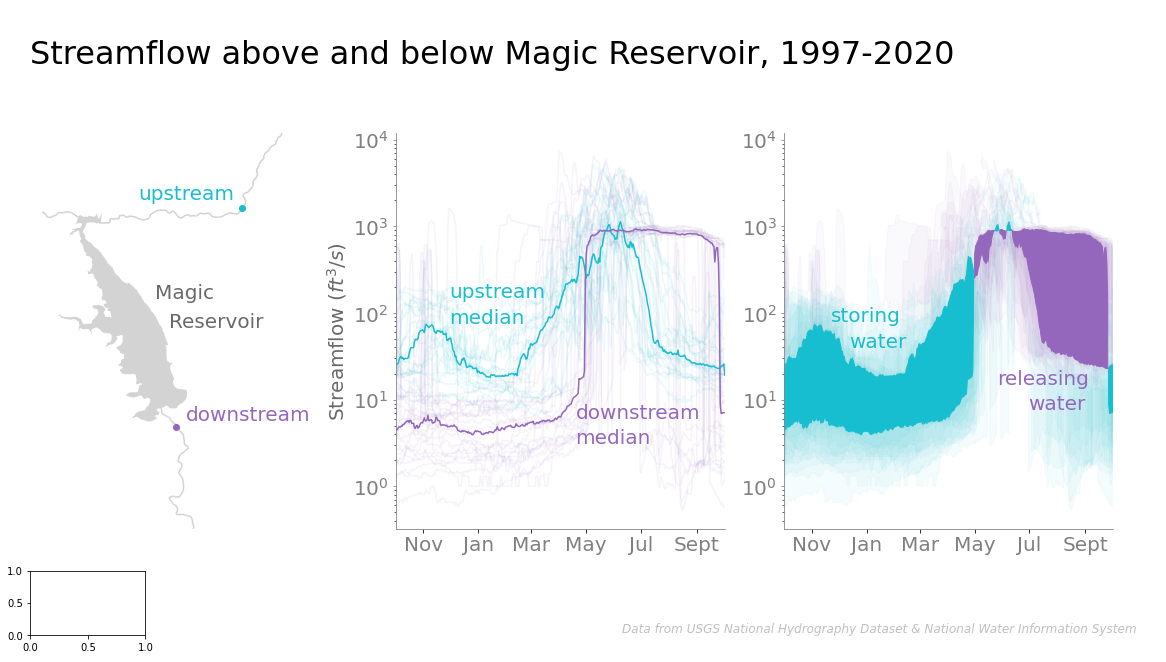

In [54]:
# check axis params
fig

In [55]:
# now add logo to axis, and remove axis lines
logo_ax.imshow(logo)
logo_ax.axis('off')

(-0.5, 2753.5, 1017.5, -0.5)

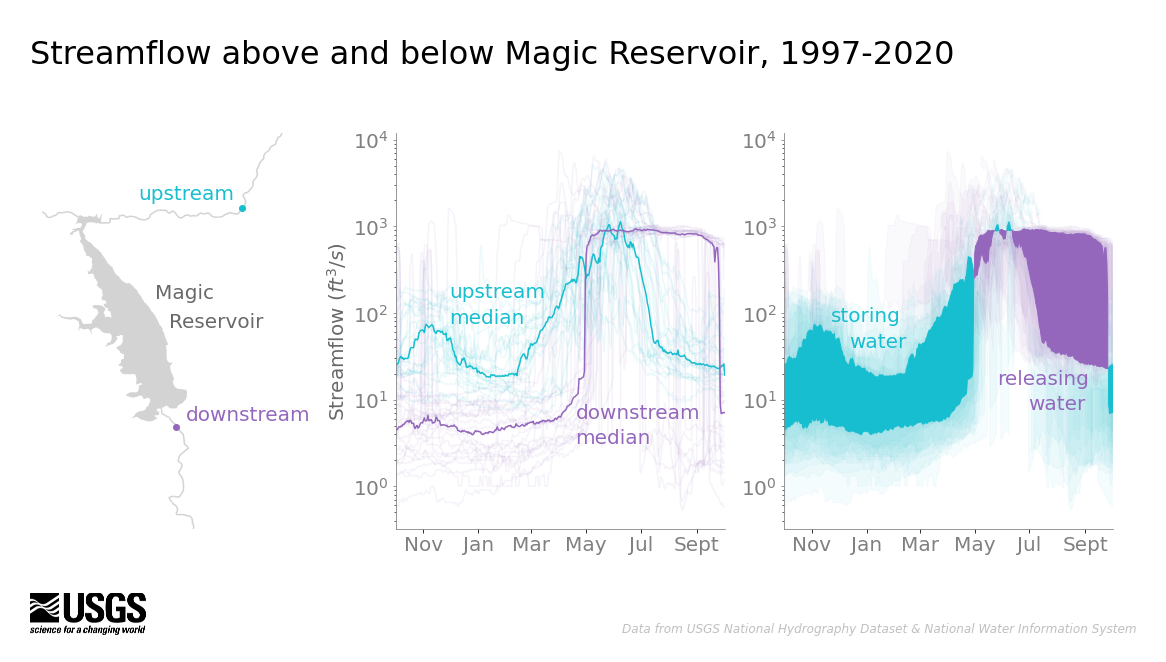

In [56]:
fig

#### Save figure

In [57]:
# Save the final image in Twitter's 16 by 9 format
# !! Use format for saving with the date of your prompt: 
#         YYYYMMDD_prompt_name ()
fig.savefig('out/20210404_magical_hcorsondosch.png', dpi=300, facecolor = plot_background_color)

## Supporting information

### Key takeaways of this viz

1. Reservoir operations for the Magic Reservoir in Idaho impact downstream streamflow, as water is stored during the wet season for release during the dry season

### Data source(s)

U.S. Geological Survey, 2016, National Water Information System data available on the World Wide Web (USGS Water Data for the Nation).

U.S. Geological Survey, 2019, National Hydrography Dataset (ver. USGS National Hydrography Dataset Best Resolution (NHD) for Hydrologic Unit (HU) 4 - 1704 (published 20191002)), accessed at URL https://apps.nationalmap.gov/downloader/#/